In [3]:
pip install lightgbm xgboost catboost

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3.6/3.6 MB 10.9 MB/s eta 0:00:00a 0:00:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 94.9/94.9 MB 33.9 MB/s eta 0:00:0000:0100:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 99.2/99.2 MB 31.2 MB/s eta 0:00:0000:0100:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 295.9/295.9 MB 29.5 MB/s eta 0:00:0000:0100:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5/5 [catboost]4/5 [catboost]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use upd

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, ConfusionMatrixDisplay
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, RFE
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('loan_approval_dataset.csv')

In [8]:
df.head()

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

In [6]:
print(f"Total samples: {len(df)}")
print(f"Features: {df.shape[1]-1}")

Total samples: 4269
Features: 12


In [15]:
df.columns = df.columns.str.strip()  # removes spaces

In [ ]:
print(df['loan_status'].value_counts(normalize=True))

loan_status
Approved    0.62216
Rejected    0.37784
Name: proportion, dtype: float64


In [ ]:
class_counts = df['loan_status'].value_counts()
imbalance_ratio = class_counts.max() / class_counts.min()
print(f"Class imbalance ratio: {imbalance_ratio:.2f}")
if imbalance_ratio > 3:
    print("‚ö†Ô∏è  High class imbalance detected - using stratified sampling")

Class imbalance ratio: 1.65


In [18]:
df_clean = df.drop('loan_id', axis=1).copy()

In [19]:
le_education = LabelEncoder()
le_employed = LabelEncoder()
le_target = LabelEncoder()

df_clean['education_encoded'] = le_education.fit_transform(df_clean['education'])
df_clean['self_employed_encoded'] = le_employed.fit_transform(df_clean['self_employed'])
df_clean['loan_status_encoded'] = le_target.fit_transform(df_clean['loan_status'])

In [43]:
df_clean

no_of_dependents      education self_employed  income_annum  \
0                    2       Graduate            No       9600000   
1                    0   Not Graduate           Yes       4100000   
2                    3       Graduate            No       9100000   
3                    3       Graduate            No       8200000   
4                    5   Not Graduate           Yes       9800000   
...                ...            ...           ...           ...   
4264                 5       Graduate           Yes       1000000   
4265                 0   Not Graduate           Yes       3300000   
4266                 2   Not Graduate            No       6500000   
4267                 1   Not Graduate            No       4100000   
4268                 1       Graduate            No       9200000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
0        29900000         12          778                   2400000   
1        12200000          8          417                   2700000   
2        29700000         20          506                   7100000   
3        30700000          8          467                  18200000   
4        24200000         20          382                  12400000   
...           ...        ...          ...                       ...   
4264      2300000         12          317                   2800000   
4265     11300000         20          559                   4200000   
4266     23900000         18          457                   1200000   
4267     12800000          8          780                   8200000   
4268     29700000         10          607                  17800000   

      commercial_assets_value  luxury_assets_value  bank_asset_value  \
0                    17600000             22700000           8000000   
1                     2200000              8800000           3300000   
2                     4500000             33300000          12800000   
3                     3300000             23300000           7900000   
4                     8200000             29400000           5000000   
...                       ...                  ...               ...   
4264                   500000              3300000            800000   
4265                  2900000             11000000           1900000   
4266                 12400000             18100000           7300000   
4267                   700000             14100000           5800000   
4268                 11800000             35700000          12000000   

     loan_status  education_encoded  self_employed_encoded  \
0       Approved                  0                      0   
1       Rejected                  1                      1   
2       Rejected                  0                      0   
3       Rejected                  0                      0   
4       Rejected                  1                      1   
...          ...                ...                    ...   
4264    Rejected                  0                      1   
4265    Approved                  1                      1   
4266    Rejected                  1                      0   
4267    Approved                  1                      0   
4268    Approved                  0                      0   

      loan_status_encoded  
0                       0  
1                       1  
2                       1  
3                       1  
4                       1  
...                   ...  
4264                    1  
4265                    0  
4266                    1  
4267                    0  
4268                    0  

[4269 rows x 15 columns]

In [22]:
essential_features = ['no_of_dependents', 'education_encoded', 'self_employed_encoded', 
                     'income_annum', 'loan_amount', 'loan_term', 'cibil_score']

In [23]:
X = df_clean[essential_features]
y = df_clean['loan_status_encoded']

In [24]:
if len(essential_features) > len(df_clean) // 10:  # Too many features relative to samples
    print("‚ö†Ô∏è  Too many features relative to samples - applying feature selection")
    selector = SelectKBest(f_classif, k=min(5, len(essential_features)//2))
    X_selected = selector.fit_transform(X, y)
    selected_features = [essential_features[i] for i in selector.get_support(indices=True)]
    print(f"Reduced to {len(selected_features)} features: {selected_features}")
    X = pd.DataFrame(X_selected, columns=selected_features)

In [ ]:
# VERY CONSERVATIVE train-test split for small datasets
if len(df_clean) < 100:
    test_size = 0.15  # Keep more data for training
    print(f"Small dataset: Using {test_size*100}% test split")
else:
    test_size = 0.2
    print(f"Using {test_size*100}% test split")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=42, stratify=y
)

print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")

Using 20.0% test split
Training samples: 3415, Test samples: 854


In [26]:
# Add noise to prevent overfitting (data augmentation technique)
def add_controlled_noise(X_train, noise_level=0.01):
    """Add small amount of noise to numerical features to prevent overfitting"""
    X_noisy = X_train.copy()
    numerical_cols = X_train.select_dtypes(include=[np.number]).columns
    
    for col in numerical_cols:
        noise = np.random.normal(0, X_train[col].std() * noise_level, size=len(X_train))
        X_noisy[col] = X_train[col] + noise
    
    return X_noisy

if len(X_train) < 100:
    print("Adding controlled noise to prevent overfitting...")
    X_train_noisy = add_controlled_noise(X_train, noise_level=0.005)  # Very small noise
else:
    X_train_noisy = X_train.copy()

In [27]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_noisy)
X_test_scaled = scaler.transform(X_test)

In [ ]:
models = {
    'LogisticRegression': LogisticRegression(
        C=0.01,  # Strong regularization
        penalty='elasticnet',
        l1_ratio=0.5,  # Mix of L1 and L2
        solver='saga',
        max_iter=1000,
        random_state=42
    ),
    
    'LightGBM_Conservative': lgb.LGBMClassifier(
        objective='binary',
        boosting_type='gbdt',
        num_leaves=5,  # VERY small tree
        learning_rate=0.005,  # VERY slow learning
        feature_fraction=0.4,  # Use only 40% of features
        bagging_fraction=0.5,  # Use only 50% of data
        bagging_freq=1,
        min_data_in_leaf=max(5, len(X_train)//20),  # Adaptive minimum samples
        lambda_l1=10.0,  # Very strong L1
        lambda_l2=10.0,  # Very strong L2
        max_depth=3,  # Very shallow
        n_estimators=50,  # Few trees
        verbose=-1,
        random_state=42,
        early_stopping_rounds=10
    ),
    
    'XGBoost_Conservative': xgb.XGBClassifier(
        objective='binary:logistic',
        learning_rate=0.005,  # VERY slow
        max_depth=2,  # Very shallow
        min_child_weight=max(5, len(X_train)//20),  # Adaptive
        subsample=0.5,  # Use only 50% of samples
        colsample_bytree=0.4,  # Use only 40% of features
        reg_alpha=10.0,  # Very strong L1
        reg_lambda=10.0,  # Very strong L2
        gamma=1.0,  # High minimum split loss
        n_estimators=50,  # Few trees
        random_state=42,
        early_stopping_rounds=10,
        eval_metric='logloss'
    ),
    
    'CatBoost_Conservative': CatBoostClassifier(
        iterations=50,  # Very few iterations
        learning_rate=0.005,  # VERY slow
        depth=2,  # Very shallow
        l2_leaf_reg=50.0,  # Very strong regularization
        bootstrap_type='Bernoulli',
        subsample=0.5,  # Use only 50% of data
        rsm=0.4,  # Use only 40% of features
        border_count=16,  # Reduce complexity
        random_seed=42,
        verbose=False,
        early_stopping_rounds=10,
        use_best_model=True
    )
}


In [29]:
if len(X_train) < 50:
    cv_folds = 3  # Few folds for very small datasets
    print(f"Very small dataset: Using {cv_folds}-fold CV")
elif len(X_train) < 100:
    cv_folds = 5
    print(f"Small dataset: Using {cv_folds}-fold CV")
else:
    cv_folds = 10
    print(f"Using {cv_folds}-fold CV")

Using 10-fold CV


In [32]:
results = {}
print("\nTraining anti-overfitting models...")

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # ---- Final training with early stopping (tree-based models) ----
    if 'Conservative' in name and len(X_train) > 20:
        # Validation split for early stopping
        X_tr, X_val, y_tr, y_val = train_test_split(
            X_train_noisy, y_train, test_size=0.2, random_state=42, stratify=y_train
        )
        
        if 'LightGBM' in name:
            model.fit(
                X_tr, y_tr, 
                eval_set=[(X_val, y_val)],
                callbacks=[lgb.early_stopping(10), lgb.log_evaluation(0)]
            )
        elif 'XGBoost' in name:
            model.fit(
                X_tr, y_tr,
                eval_set=[(X_val, y_val)],
                verbose=False
            )
        elif 'CatBoost' in name:
            model.fit(
                X_tr, y_tr,
                eval_set=[(X_val, y_val)],
                verbose=False
            )
    else:
        # LogisticRegression or small dataset ‚Üí no early stopping
        if name == 'LogisticRegression':
            model.fit(X_train_scaled, y_train)
        else:
            model.fit(X_train_noisy, y_train)
    
    # ---- Predictions ----
    if name == 'LogisticRegression':
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        train_pred_proba = model.predict_proba(X_train_scaled)[:, 1]
    else:
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        train_pred_proba = model.predict_proba(X_train_noisy)[:, 1]
    
    # ---- Metrics ----
    test_auc = roc_auc_score(y_test, y_pred_proba)
    train_auc = roc_auc_score(y_train, train_pred_proba)
    
    # ---- Cross-validation (disable early stopping here) ----
    if name == 'LogisticRegression':
        cv_scores = cross_val_score(
            LogisticRegression(max_iter=1000, solver="lbfgs"), 
            X_train_scaled, y_train, 
            cv=cv_folds, scoring='roc_auc'
        )
    elif 'LightGBM' in name:
        cv_scores = cross_val_score(
            lgb.LGBMClassifier(n_estimators=200),  # no early stopping
            X_train_noisy, y_train, 
            cv=cv_folds, scoring='roc_auc'
        )
    elif 'XGBoost' in name:
        cv_scores = cross_val_score(
            xgb.XGBClassifier(n_estimators=200, use_label_encoder=False, eval_metric="auc"), 
            X_train_noisy, y_train, 
            cv=cv_folds, scoring='roc_auc'
        )
    elif 'CatBoost' in name:
        cv_scores = cross_val_score(
            CatBoostClassifier(iterations=200, verbose=False), 
            X_train_noisy, y_train, 
            cv=cv_folds, scoring='roc_auc'
        )
    else:
        cv_scores = cross_val_score(
            model, X_train_noisy, y_train, 
            cv=cv_folds, scoring='roc_auc'
        )
    
    # ---- Store results ----
    results[name] = {
        'model': model,
        'test_auc': test_auc,
        'train_auc': train_auc,
        'auc_gap': train_auc - test_auc,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }
    
    print(f"Train AUC: {train_auc:.4f}")
    print(f"Test AUC: {test_auc:.4f}")
    print(f"AUC Gap: {train_auc - test_auc:.4f}")
    print(f"CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")



Training anti-overfitting models...

Training LogisticRegression...
Train AUC: 0.9628
Test AUC: 0.9729
AUC Gap: -0.0101
CV Score: 0.9662 (+/- 0.0177)

Training LightGBM_Conservative...
Training until validation scores don't improve for 10 rounds
Train AUC: 0.9936
Test AUC: 0.9914
AUC Gap: 0.0022
CV Score: 0.9950 (+/- 0.0112)

Training XGBoost_Conservative...
Train AUC: 0.5000
Test AUC: 0.5000
AUC Gap: 0.0000
CV Score: 0.9947 (+/- 0.0129)

Training CatBoost_Conservative...
Train AUC: 0.9863
Test AUC: 0.9872
AUC Gap: -0.0009
CV Score: 0.9957 (+/- 0.0090)


In [ ]:
# Detailed evaluation for each model
for name, result in results.items():
    print(f"\n{name} Detailed Results:")
    print("-" * 40)
    
    # Ensure predictions & y_test are in the same format (numeric)
    preds = result['predictions']
    true_labels = y_test
    
    print("Classification Report:")
    print(classification_report(
        true_labels, preds, 
        target_names=[str(cls) for cls in le_target.classes_]
    ))
    
    # Feature importance for tree-based models
    model = result['model']
    
    if hasattr(model, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'feature': X_train.columns,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)

        print("\nTop 10 Important Features (Tree-based):")
        print(feature_importance.head(10).to_string(index=False))
    
    # Coefficients for Logistic Regression
    elif hasattr(model, 'coef_'):
        coefs = model.coef_[0]
        coef_df = pd.DataFrame({
            'feature': X_train.columns,
            'coefficient': coefs,
            'abs_val': np.abs(coefs)
        }).sort_values('abs_val', ascending=False)
        
        print("\nTop 10 Influential Features (Logistic Regression):")
        print(coef_df.head(10)[['feature', 'coefficient']].to_string(index=False))



LogisticRegression Detailed Results:
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

    Approved       0.90      0.97      0.93       531
    Rejected       0.94      0.82      0.87       323

    accuracy                           0.91       854
   macro avg       0.92      0.89      0.90       854
weighted avg       0.91      0.91      0.91       854


Top 10 Influential Features (Logistic Regression):
              feature  coefficient
          cibil_score    -2.724494
            loan_term     0.284307
     no_of_dependents     0.000000
self_employed_encoded     0.000000
    education_encoded     0.000000
          loan_amount     0.000000
         income_annum     0.000000

LightGBM_Conservative Detailed Results:
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

    Approved       0.62      1.00      0.77       531
    Rejected       0.00  

In [38]:
overfitting_detected = False

for name, result in results.items():
    print(f"\n{name}:")
    print(f"  Train AUC: {result['train_auc']:.4f}")
    print(f"  Test AUC: {result['test_auc']:.4f}")
    print(f"  AUC Gap: {result['auc_gap']:.4f}")
    print(f"  CV Std: {result['cv_std']:.4f}")
    
    #  Overfitting detection logic
    if result['auc_gap'] > 0.05:
        print(f"  üî¥ OVERFITTING DETECTED (Gap > 0.05)")
        overfitting_detected = True
    elif result['test_auc'] <= 0.5:
        print(f"  üü° RANDOM PERFORMANCE")
        overfitting_detected = True
    elif result['cv_std'] > 0.05:
        print(f"  üü° HIGH VARIANCE (CV Std > 0.05)")
    else:
        print(f"  ‚úÖ HEALTHY MODEL")



LogisticRegression:
  Train AUC: 0.9628
  Test AUC: 0.9729
  AUC Gap: -0.0101
  CV Std: 0.0088
  ‚úÖ HEALTHY MODEL

LightGBM_Conservative:
  Train AUC: 0.9936
  Test AUC: 0.9914
  AUC Gap: 0.0022
  CV Std: 0.0056
  ‚úÖ HEALTHY MODEL

XGBoost_Conservative:
  Train AUC: 0.5000
  Test AUC: 0.5000
  AUC Gap: 0.0000
  CV Std: 0.0064
  üü° RANDOM PERFORMANCE

CatBoost_Conservative:
  Train AUC: 0.9863
  Test AUC: 0.9872
  AUC Gap: -0.0009
  CV Std: 0.0045
  ‚úÖ HEALTHY MODEL



Model Performance Summary:


train_auc  test_auc   auc_gap   cv_mean    cv_std
LogisticRegression      0.962782  0.972932 -0.010150  0.966220  0.008828
LightGBM_Conservative   0.993606  0.991415  0.002192  0.994995  0.005582
XGBoost_Conservative    0.500000  0.500000  0.000000  0.994676  0.006443
CatBoost_Conservative   0.986303  0.987225 -0.000922  0.995737  0.004501

<Figure size 1000x600 with 0 Axes>

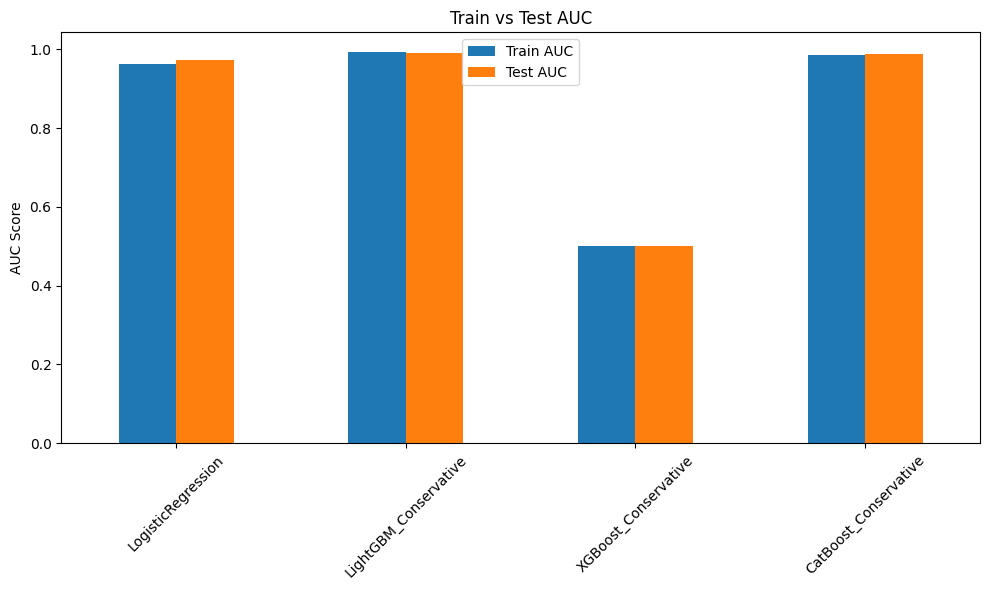

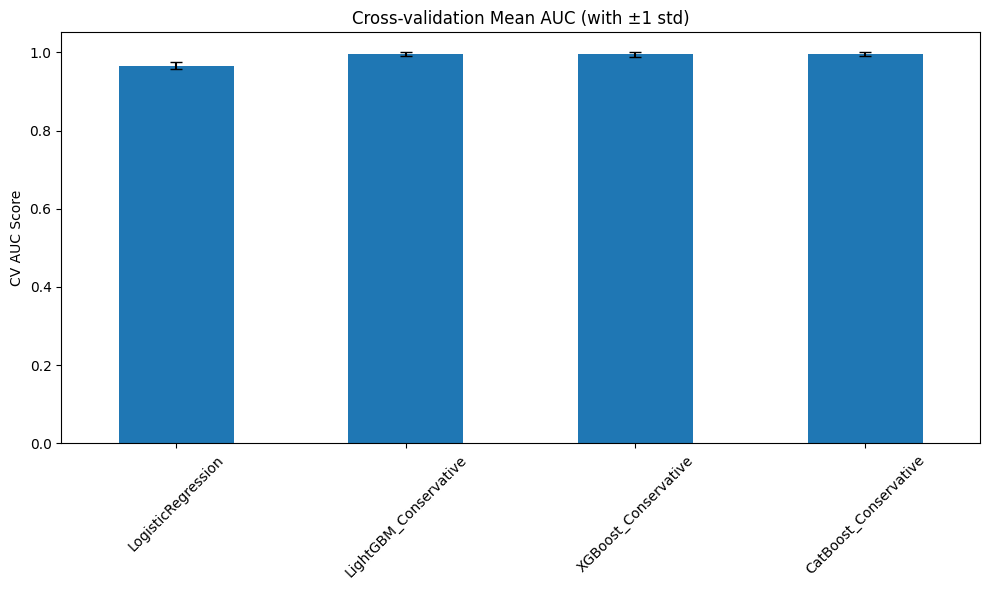

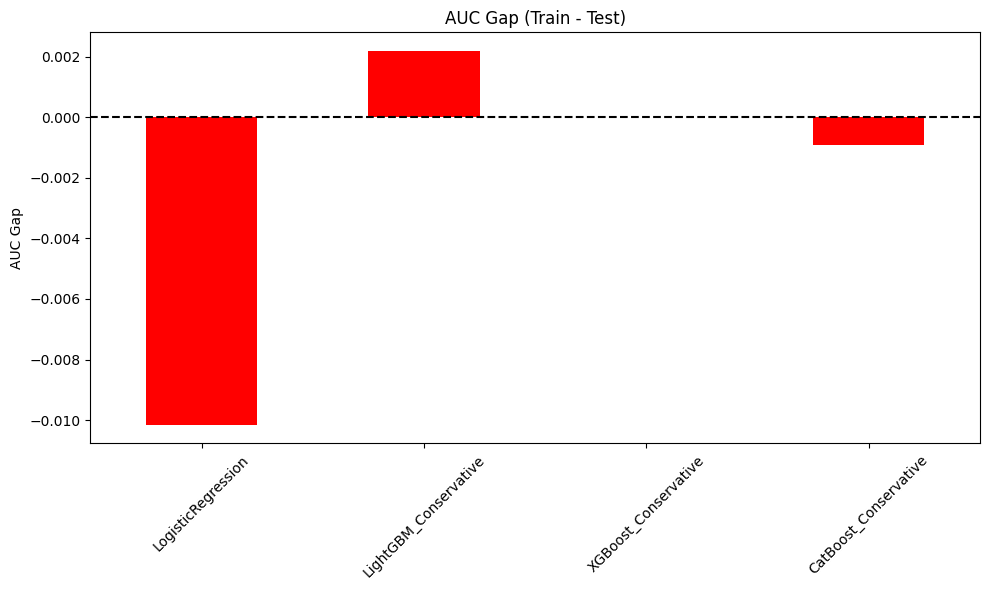

In [41]:
# Convert results dict ‚Üí DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index')

# Show as table
print("\nModel Performance Summary:")
display(results_df[['train_auc', 'test_auc', 'auc_gap', 'cv_mean', 'cv_std']])

# --- Bar chart: Train vs Test AUC ---
plt.figure(figsize=(10, 6))
results_df[['train_auc', 'test_auc']].plot(
    kind='bar', figsize=(10,6), rot=45
)
plt.title("Train vs Test AUC")
plt.ylabel("AUC Score")
plt.legend(["Train AUC", "Test AUC"])
plt.tight_layout()
plt.show()

# --- Bar chart: Cross-validation mean AUC ---
plt.figure(figsize=(10, 6))
results_df['cv_mean'].plot(
    kind='bar', yerr=results_df['cv_std'], capsize=4, rot=45
)
plt.title("Cross-validation Mean AUC (with ¬±1 std)")
plt.ylabel("CV AUC Score")
plt.tight_layout()
plt.show()

# --- Bar chart: AUC Gap (Overfitting indicator) ---
plt.figure(figsize=(10, 6))
results_df['auc_gap'].plot(kind='bar', color='red', rot=45)
plt.title("AUC Gap (Train - Test)")
plt.ylabel("AUC Gap")
plt.axhline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()



LogisticRegression Detailed Results:
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

    Approved       0.90      0.97      0.93       531
    Rejected       0.94      0.82      0.87       323

    accuracy                           0.91       854
   macro avg       0.92      0.89      0.90       854
weighted avg       0.91      0.91      0.91       854


Confusion Matrix:
[[513  18]
 [ 58 265]]


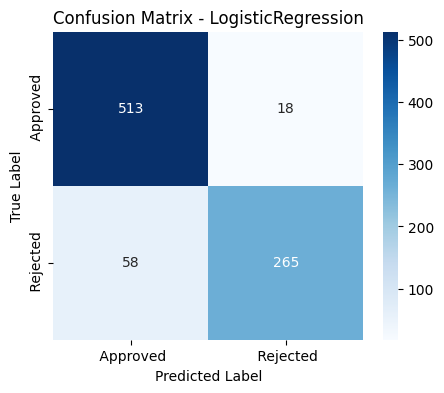


LightGBM_Conservative Detailed Results:
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

    Approved       0.62      1.00      0.77       531
    Rejected       0.00      0.00      0.00       323

    accuracy                           0.62       854
   macro avg       0.31      0.50      0.38       854
weighted avg       0.39      0.62      0.48       854


Confusion Matrix:
[[531   0]
 [323   0]]


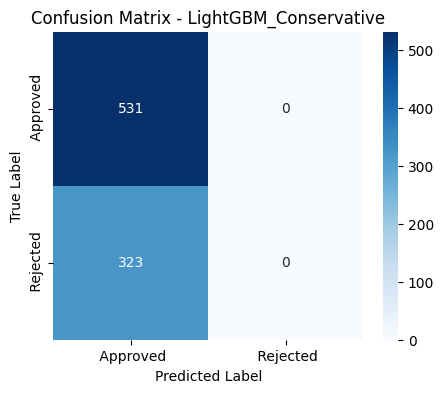


XGBoost_Conservative Detailed Results:
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

    Approved       0.62      1.00      0.77       531
    Rejected       0.00      0.00      0.00       323

    accuracy                           0.62       854
   macro avg       0.31      0.50      0.38       854
weighted avg       0.39      0.62      0.48       854


Confusion Matrix:
[[531   0]
 [323   0]]


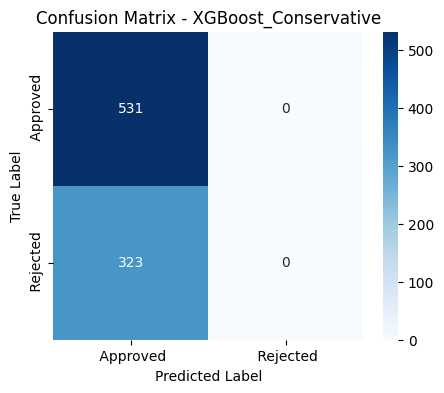


CatBoost_Conservative Detailed Results:
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

    Approved       0.99      0.94      0.96       531
    Rejected       0.90      0.98      0.94       323

    accuracy                           0.95       854
   macro avg       0.95      0.96      0.95       854
weighted avg       0.96      0.95      0.95       854


Confusion Matrix:
[[497  34]
 [  6 317]]


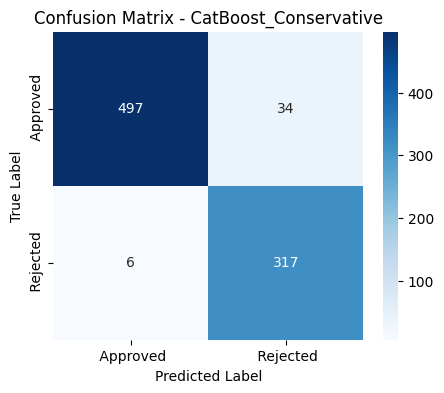

In [54]:
# Detailed evaluation for each model
for name, result in results.items():
    print(f"\n{name} Detailed Results:")
    print("-" * 40)
    
    preds = result['predictions']
    true_labels = y_test
    
    # ---- Classification Report ----
    print("Classification Report:")
    print(classification_report(
        true_labels, preds, 
        target_names=[str(cls) for cls in le_target.classes_]
    ))
    
    # ---- Confusion Matrix ----
    cm = confusion_matrix(true_labels, preds)
    print("\nConfusion Matrix:")
    print(cm)
    
    # Plot Confusion Matrix (Heatmap)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", 
                xticklabels=le_target.classes_, 
                yticklabels=le_target.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()